# MPSlib: computationof entropy and self-information
The self-information, and entropy (the average self-information), acan be commputed using MPSlib by setting

    do_entropy=1
    
This works for all algorithms excpet when using mps_genesim in 'direct sampling mode', when O.par['n_max_cpdf_count']=1
    
See details in 

[Hansen, Thomas Mejer. "Entropy and information content of geostatistical models." Mathematical Geosciences 53.1 (2021): 163-184](https://doi.org/10.1007/s11004-020-09876-z)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


## Setup MPSLib
Setup MPSlib, and select to compute entropy using for example

In [2]:
# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
#O = mps.mpslib(method='mps_genesim', simulation_grid_size=[80,70,1], n_max_cpdf_count=30, verbose_level=-1)
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1], verbose_level=-1)
O.delete_local_files()
O.par['n_real'] = 1000
O.par['n_cond']= 9
# Choose to compute entropy
O.par['do_entropy']=1
TI, TI_filename = mps.trainingimages.strebelle(di=4, coarse3d=1)
O.ti = TI

O_all = O.run_parallel()


## Plot entropy

Text(0.5, 1.0, 'Entropy as a function of number of realizations')

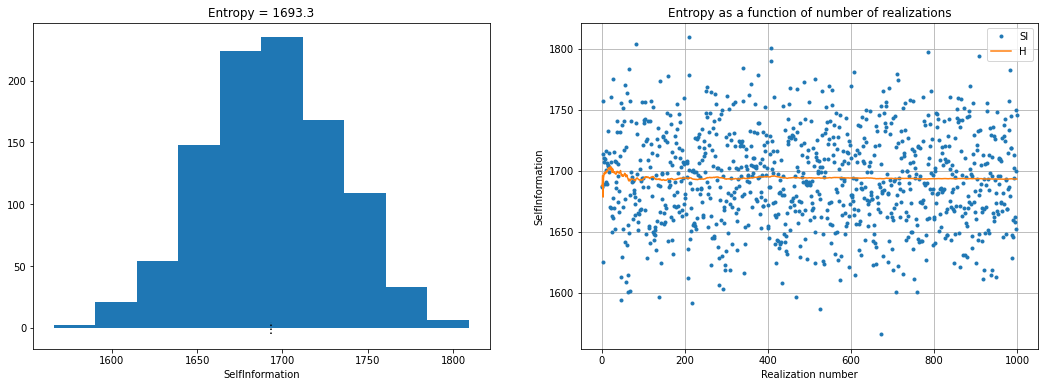

In [3]:
fig = plt.figure(figsize=(18, 6))

plt.subplot(1,2,1)
plt.hist(O.SI)
plt.plot(np.array([1, 1])*O.H,[-5,5],'k:')
plt.xlabel('SelfInformation')
plt.title('Entropy = %3.1f' % (O.H))

plt.subplot(1,2,2)
plt.plot(O.SI,'.', label='SI')

plt.plot(np.cumsum(O.SI)/(np.arange(1,1+len(O.SI))),'-',label='H')
plt.legend()
plt.grid()

plt.xlabel('Realization number')
plt.ylabel('SelfInformation')
plt.title('Entropy as a function of number of realizations' % (O.H))

## Entropy as a function of number of conditional data

In [ ]:
TI, TI_filename = mps.trainingimages.strebelle(di=4, coarse3d=1)

n_cond_arr = np.array([1,2,4,6,8,12,16,24,32,64])

H=np.zeros(n_cond_arr.size) # entropy
t=np.zeros(n_cond_arr.size) # simulation time
i=0                      
SI=[]
for n_cond in n_cond_arr:
    O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1], verbose_level=-1)
    O.par['n_real'] = 20
    O.par['n_cond']=n_cond
    # Choose to compute entropy
    O.par['do_entropy']=1
    O.TI = TI;
    
    O.run_parallel()
    #O.run()
    print('n_cond = %d, H=%4.1f' % (n_cond,O.H))
    SI.append(O.SI) # Self-information
    H[i]=O.H # Entropy
    t[i]=O.time
    i=i+1


n_cond = 1, H=3263.7
n_cond = 2, H=2647.7
n_cond = 4, H=2387.2
n_cond = 6, H=2068.9
n_cond = 8, H=1807.3
n_cond = 12, H=1402.1
n_cond = 16, H=1073.9


In [ ]:
plt.figure(figsize=(12, 5), dpi=80)

ax1 = plt.subplot(1, 3, 1)
plt.plot(n_cond_arr,SI,'*')
plt.plot(n_cond_arr,H,'k-')
plt.grid()
plt.xlabel('n_cond')
plt.ylabel('H, Entropy')

ax2 = plt.subplot(1, 3, 2)
plt.plot(n_cond_arr,t,'k-*')
plt.grid()
plt.xlabel('n_cond')
plt.ylabel('simulation time')

ax3 = plt.subplot(1, 3, 3)
plt.plot(H,t,'k-*')
plt.grid()
plt.xlabel('H, Entropy')
plt.ylabel('simulation time')
